# Libraries

In [120]:
import requests
import bs4
from collections import Counter
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import wordnet as wn 

# Functions

In [ ]:
def recipe_urls_in page(url):
    """Given an webpage url returns a list of 
    recipe urls in the webpage
    (CAUTION: Applies to allrecipes.com only)"""
    
    res = requests.get(url)
    res.raise_for_status()
    soup = bs4.BeautifulSoup(res.text, "lxml")
    elems = soup.find_all('article', class_ = "fixed-recipe-card")
    recipe_urls = [elem.find_all('a')[0].get('href') for elem in elems]
    return recipe_urls

In [ ]:
def recipe(url):
    """Given a url of a recipe returns a list of ingredients
    (CAUTION: Applies to allrecipes.com only)"""    
    
    ingredients = []
    res = requests.get(url)
    res.raise_for_status()
    soup = bs4.BeautifulSoup(res.text, "lxml")
    lines = soup.find_all('li', class_= "checkList__line")[:-4]
    for line in lines:
        item = line.find('label').get('title').split(" ")
        ingredients.extend(item)
                          
    return ingredients

In [121]:
def reviews_and_ratings(recipe_url):
    """Given a url of a recipe returns 
    the number of reviews and rating
    (CAUTION: Applies to allrecipes.com only)"""    
    
    res = requests.get(recipe_url)
    res.raise_for_status()
    soup = bs4.BeautifulSoup(res.text, "lxml")
    reviews = int(soup.find('span', class_="review-count").getText().split(' ')[0])
    rating = float(soup.find('div', class_="rating-stars").get("data-ratingstars"))
                          
    return reviews, rating

# Middle-eastern recipes

## Sites to explore

In [122]:
NUM_PAGES_ME = 21
base_url_me = "https://www.allrecipes.com/recipes/235/world-cuisine/middle-eastern/?page="

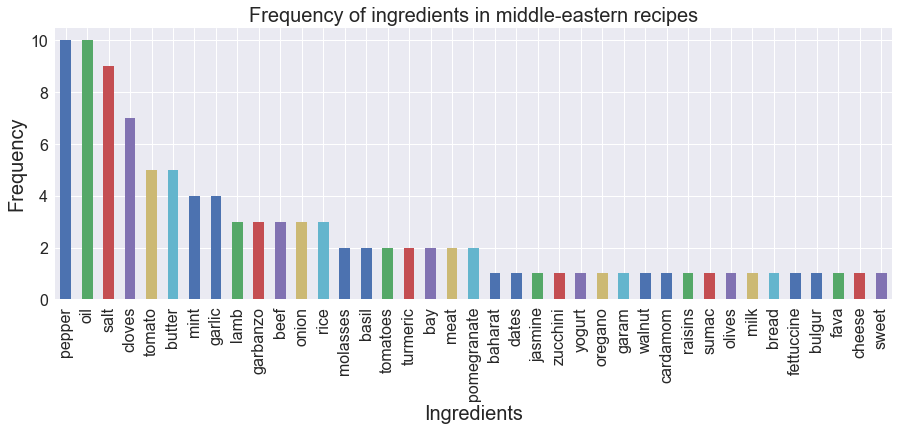

In [123]:
# list of urls of recipes 
recipe_urls = recipe_urls_in_page(url)

# list of words in the recipes 
ingredient_list = []
for recipe_url in recipe_urls:
    ingredient_list.extend(ingredients(recipe_url))
    
ingredient_list = [ingredient.lower() for ingredient in ingredient_list]

# list of unique words in recipes
ingredient_unique = list(set(ingredient_list))

# Code help from https://stackoverflow.com/questions/40167612/
# how-to-keep-only-the-noun-words-in-a-wordlist-python-nltk
text=' '.join(ingredient_unique)
tokens = nltk.word_tokenize(text)
tags = nltk.pos_tag(tokens)
# ingredients should be nouns
nouns = [word for word, pos in tags if (pos == 'NN' or pos == 'NNP' 
                                       or pos == 'NNS' or pos == 'NNPS')]
# nouns but not ingredients
to_remove_set = {'aleppo', 'beans', 'bittersweet', 'boneless', 'bunch', 'bunches',
                  'cooking', 'dressing', 'drumsticks', 'fat', 'firmly', 'flakes','greek-style',
                  'ground', 'halves', 'head', 'inch', 'juice', 'leaves', 'leg', 'liquid',
                  'mix', 'ounce', 'ounces', 'package', 'paste', 'pieces', 'plus', 'pods',
                  'pound', 'pounds', 'romaine', 'russet', 'slices', 'slivers', 'spicy', 'stew',
                  'sticks', 'strips', 'tablespoons', 'taste', 'teaspoons', 'water',
                  'cup', 'cups', 'tablespoon', 'ripe', 'basmati', 'bell', 'quart', 'pinch',
                  'thighs', 'half-and-half', 'cultures'}

# unique ingredients
ingredients = set(nouns) - to_remove_set

# list of actual ingredients in recipes
ingredient_list_w_rep = [item for item in ingredient_list if item in ingredients]
# replace breads by bread, and so on
replace_list = ['breads','onions', 'peppers']
ingredient_list_wo_rep = [item if item not in replace_list else item[:-1] 
                          for item in ingredient_list_w_rep if item in ingredients]

ingredient_series = pd.Series(ingredient_list_wo_rep)
ingredient_series.value_counts().plot(kind='bar', figsize=(15, 5), rot = 90, fontsize=16)

plt.xlabel('Ingredients', size=20)
plt.ylabel('Frequency', size=20)
plt.title('Frequency of ingredients in middle-eastern recipes', size=20);

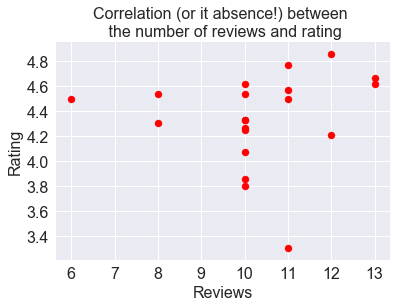

In [124]:
# list of reviews and ratings
revs_and_rate = []
for recipe_url in recipe_urls:
    revs_and_rate.append(reviews_and_ratings(recipe_url))
df = pd.DataFrame(revs_and_rate, columns=['reviews', 'rating'])

plt.scatter(df.reviews, df.rating, c='r', s=50)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel('Reviews', size=16)
plt.ylabel('Rating', size=16)
plt.title('Correlation (or it absence!) between \n the number of reviews and rating', size=16);